In [ ]:
# Data Loading and Preprocess

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [7]:
# Load the dataset
file_path = 'aug_train.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
# Data Preprocessing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handling missing values
data = data.dropna()

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Data Visualization

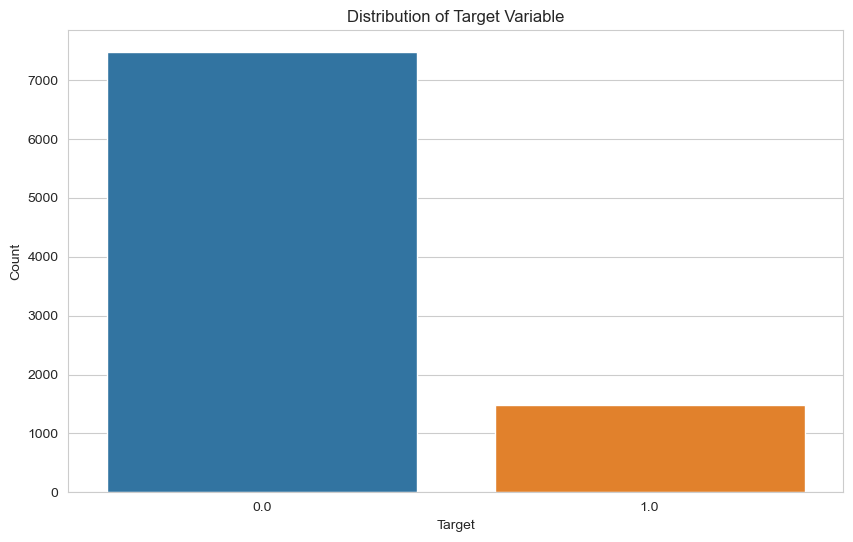

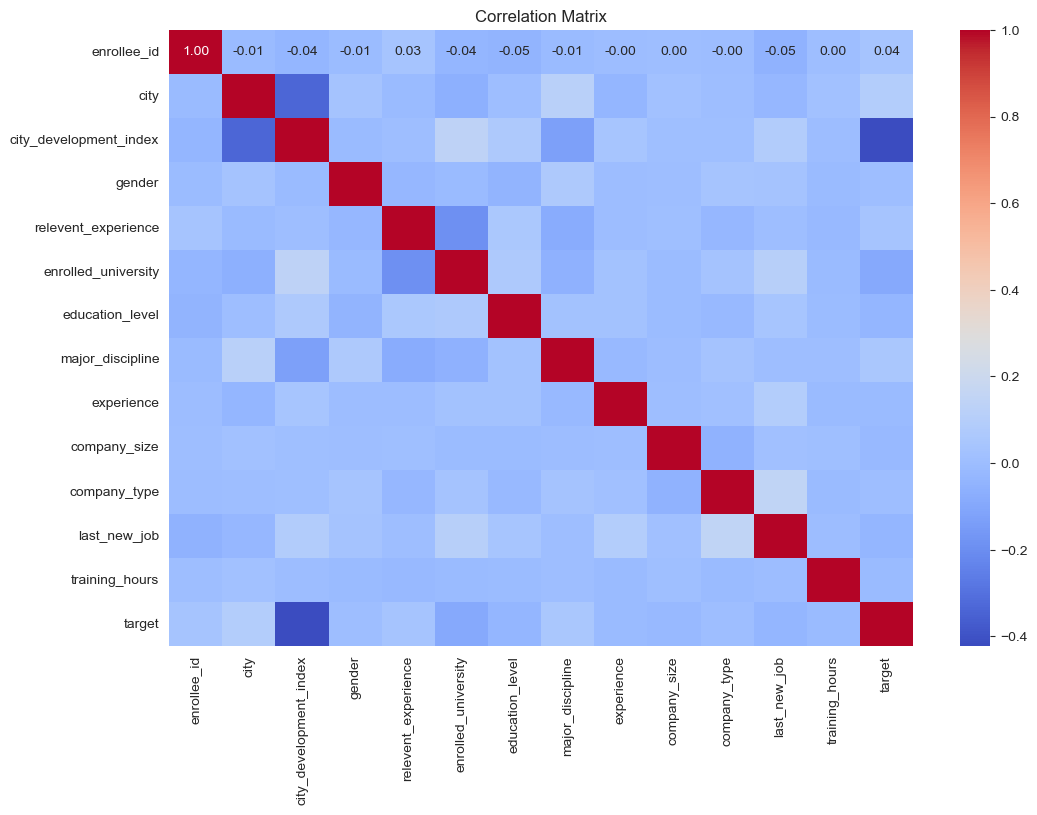

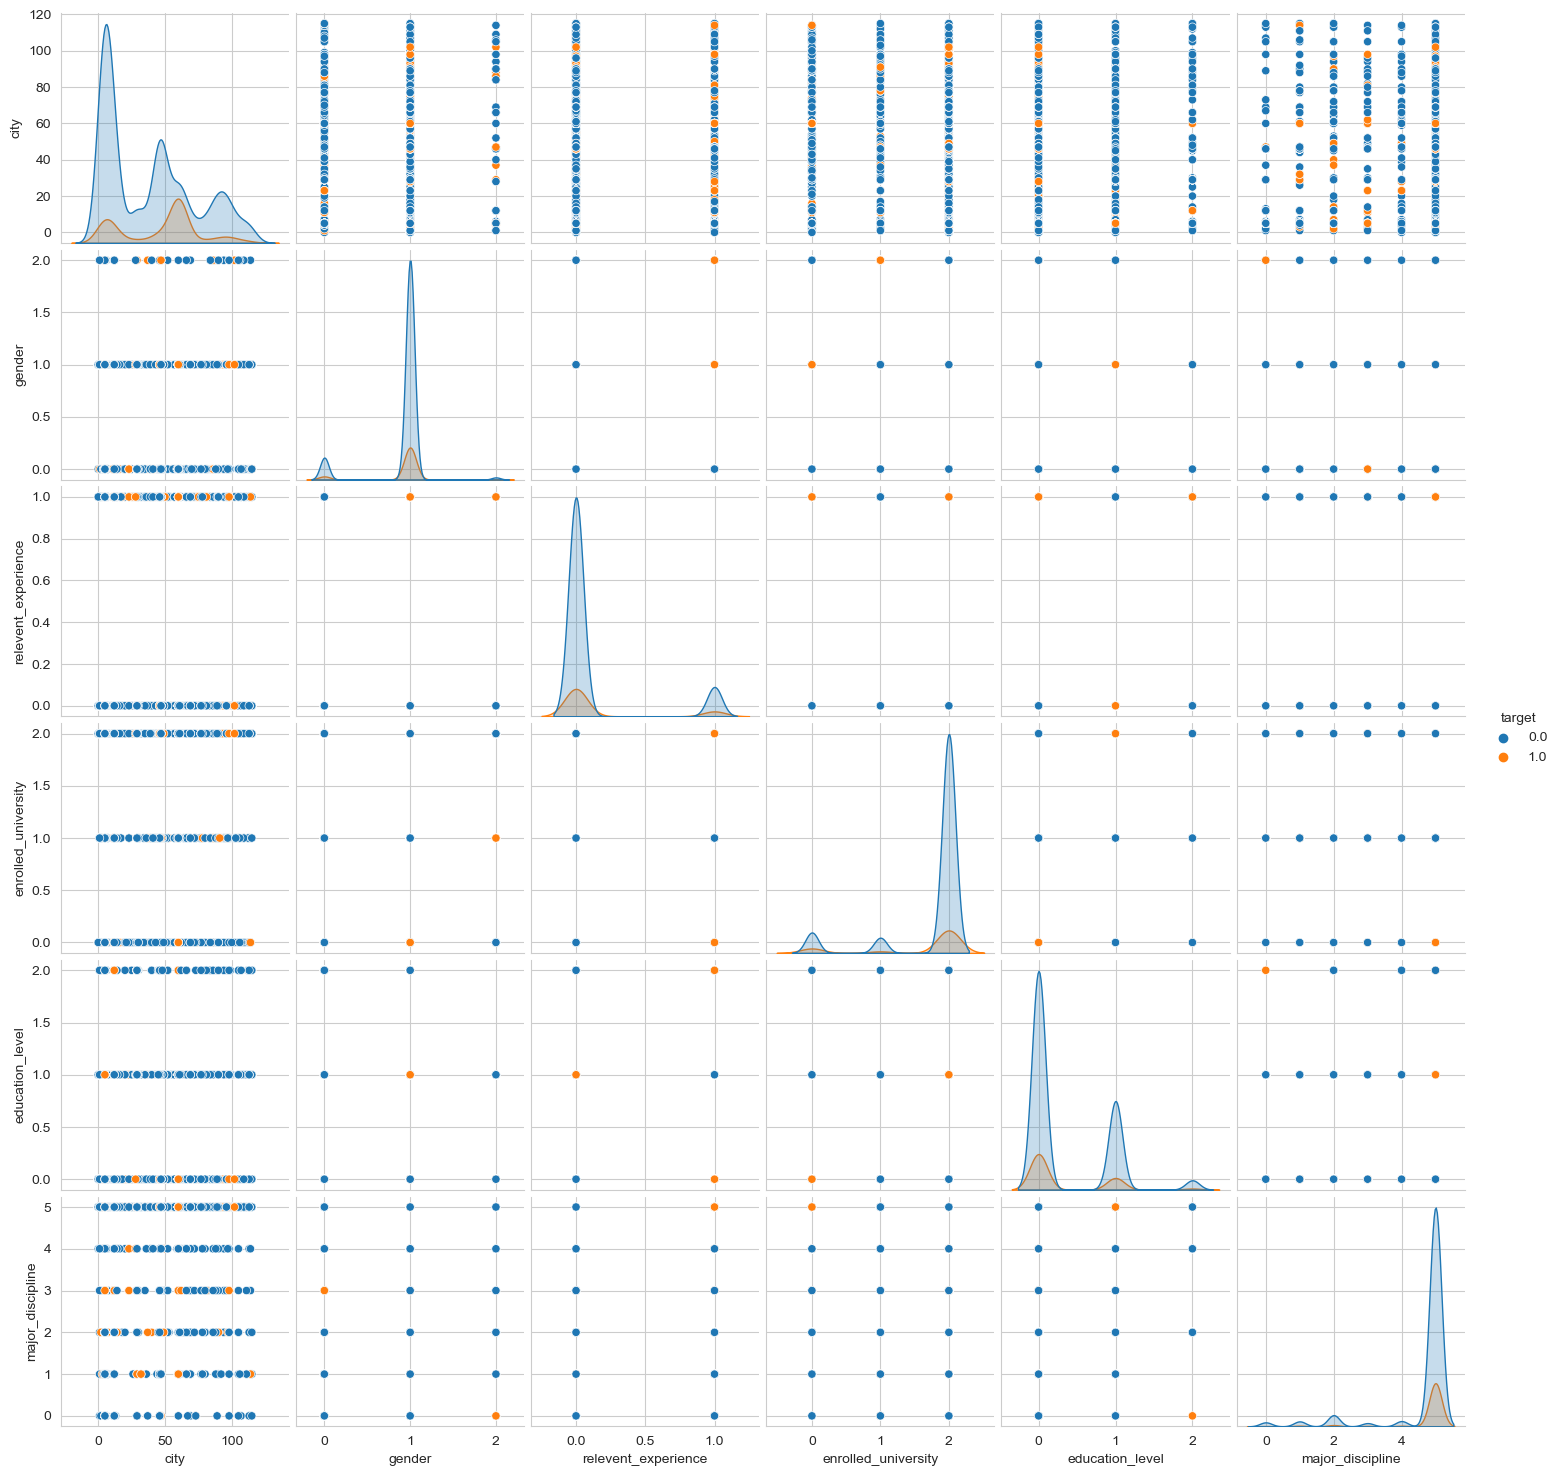

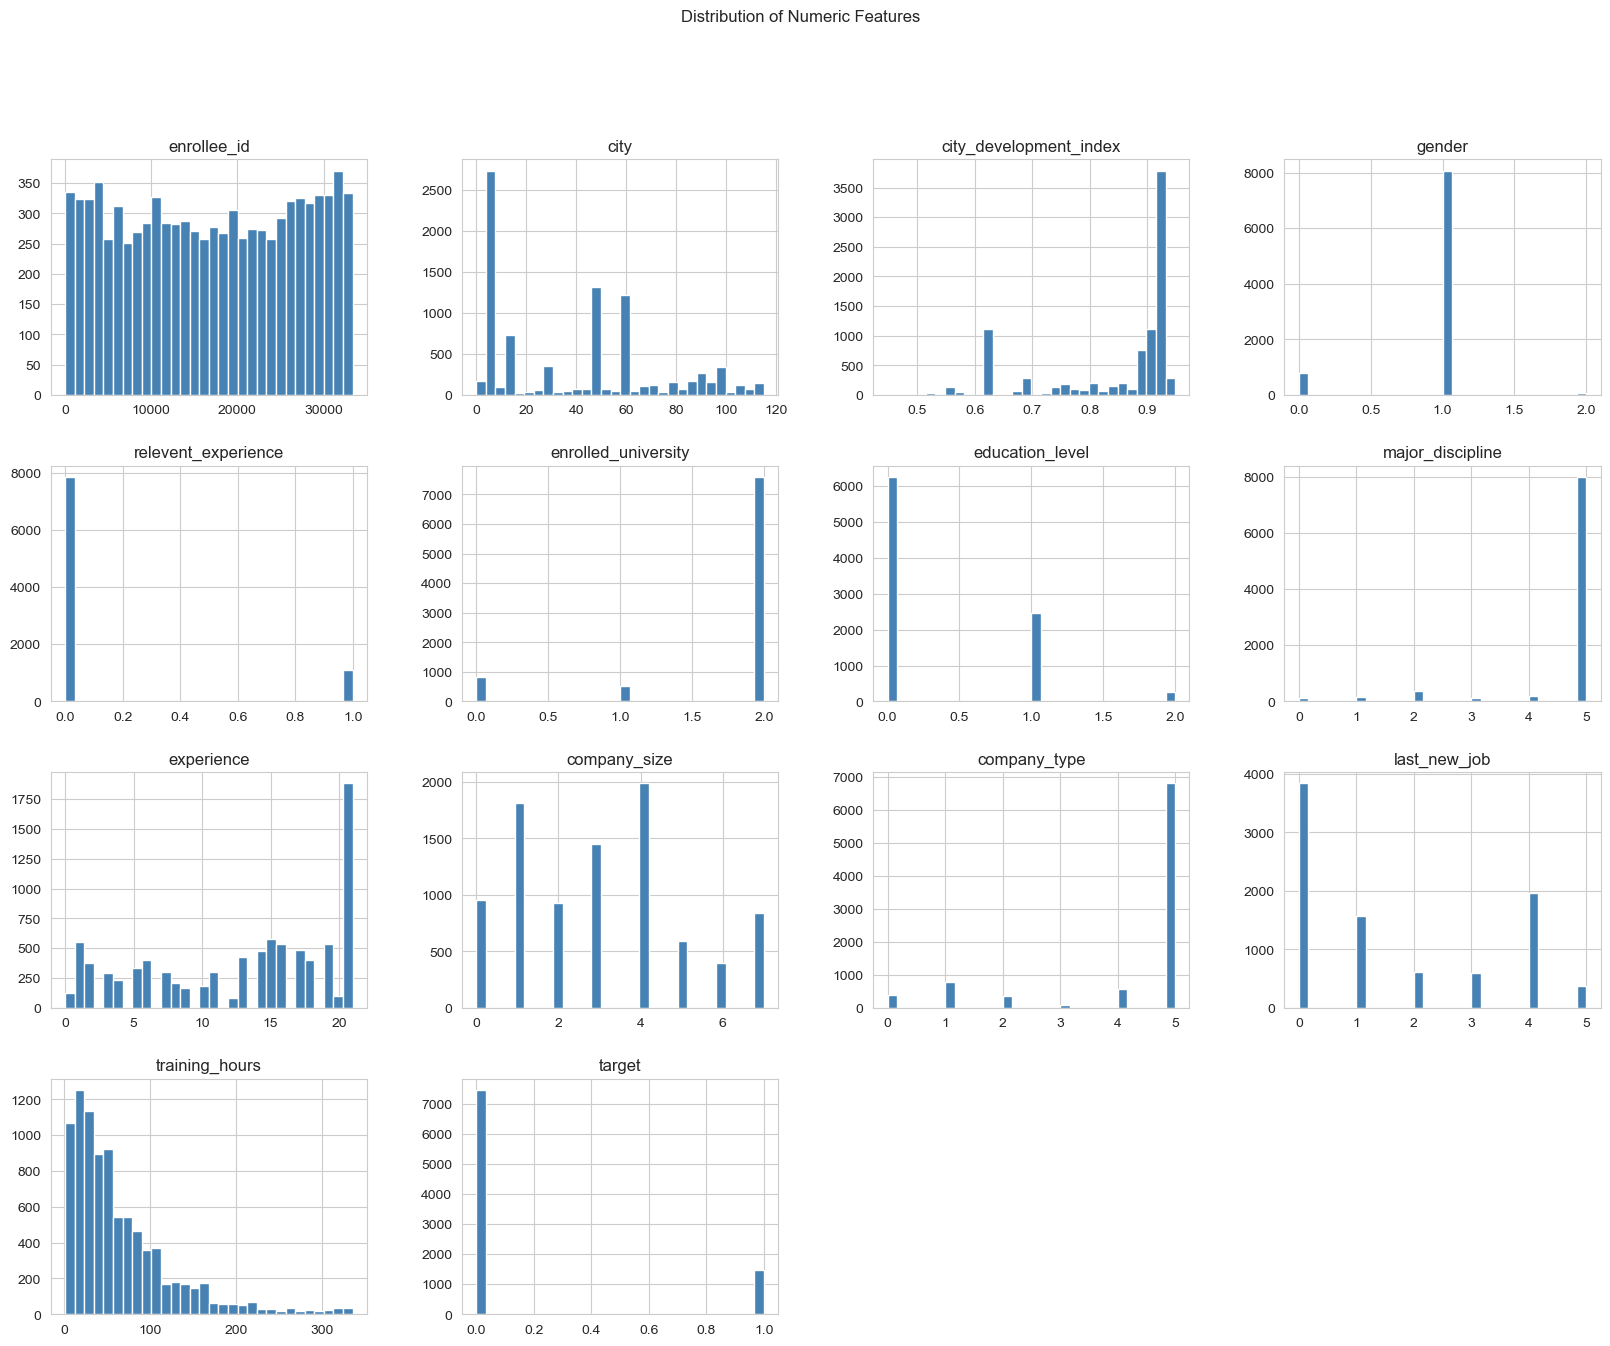

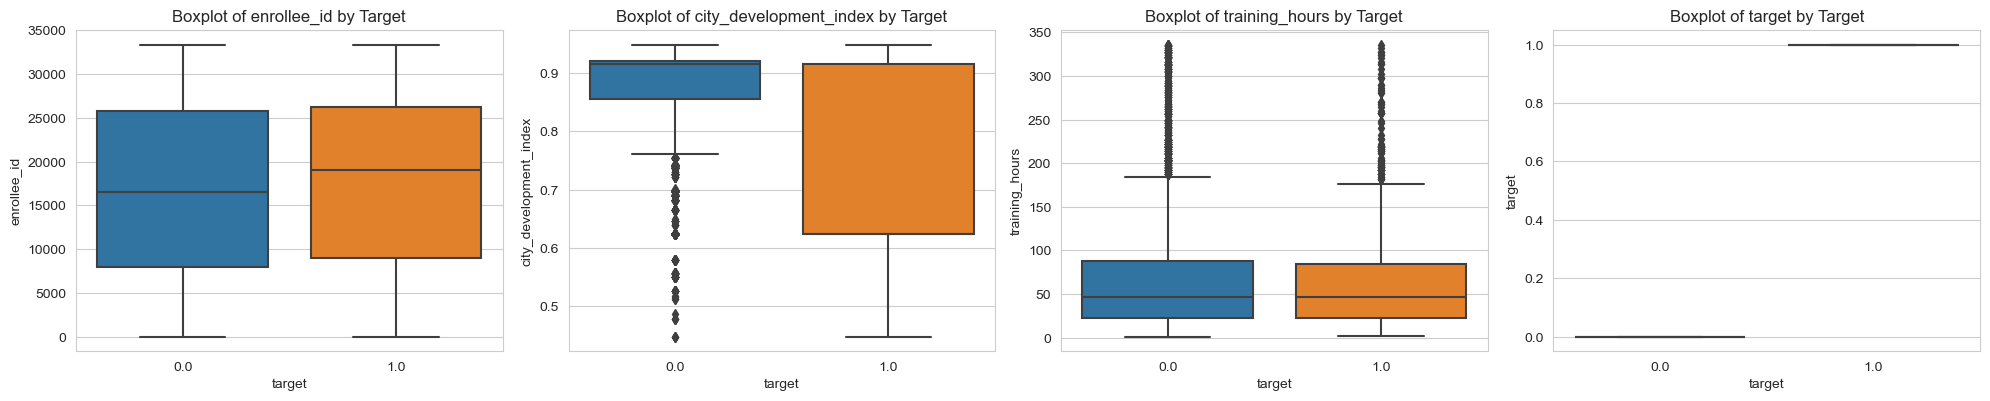

In [42]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for a subset of features
subset = data[['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'target']]
sns.pairplot(subset, hue='target')
plt.show()

# Distribution of numeric features
data.hist(bins=30, figsize=(20, 15), color='steelblue')
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Boxplots of numeric features grouped by target
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='target', y=col, data=data)
    plt.title(f'Boxplot of {col} by Target')
plt.tight_layout()
plt.show()

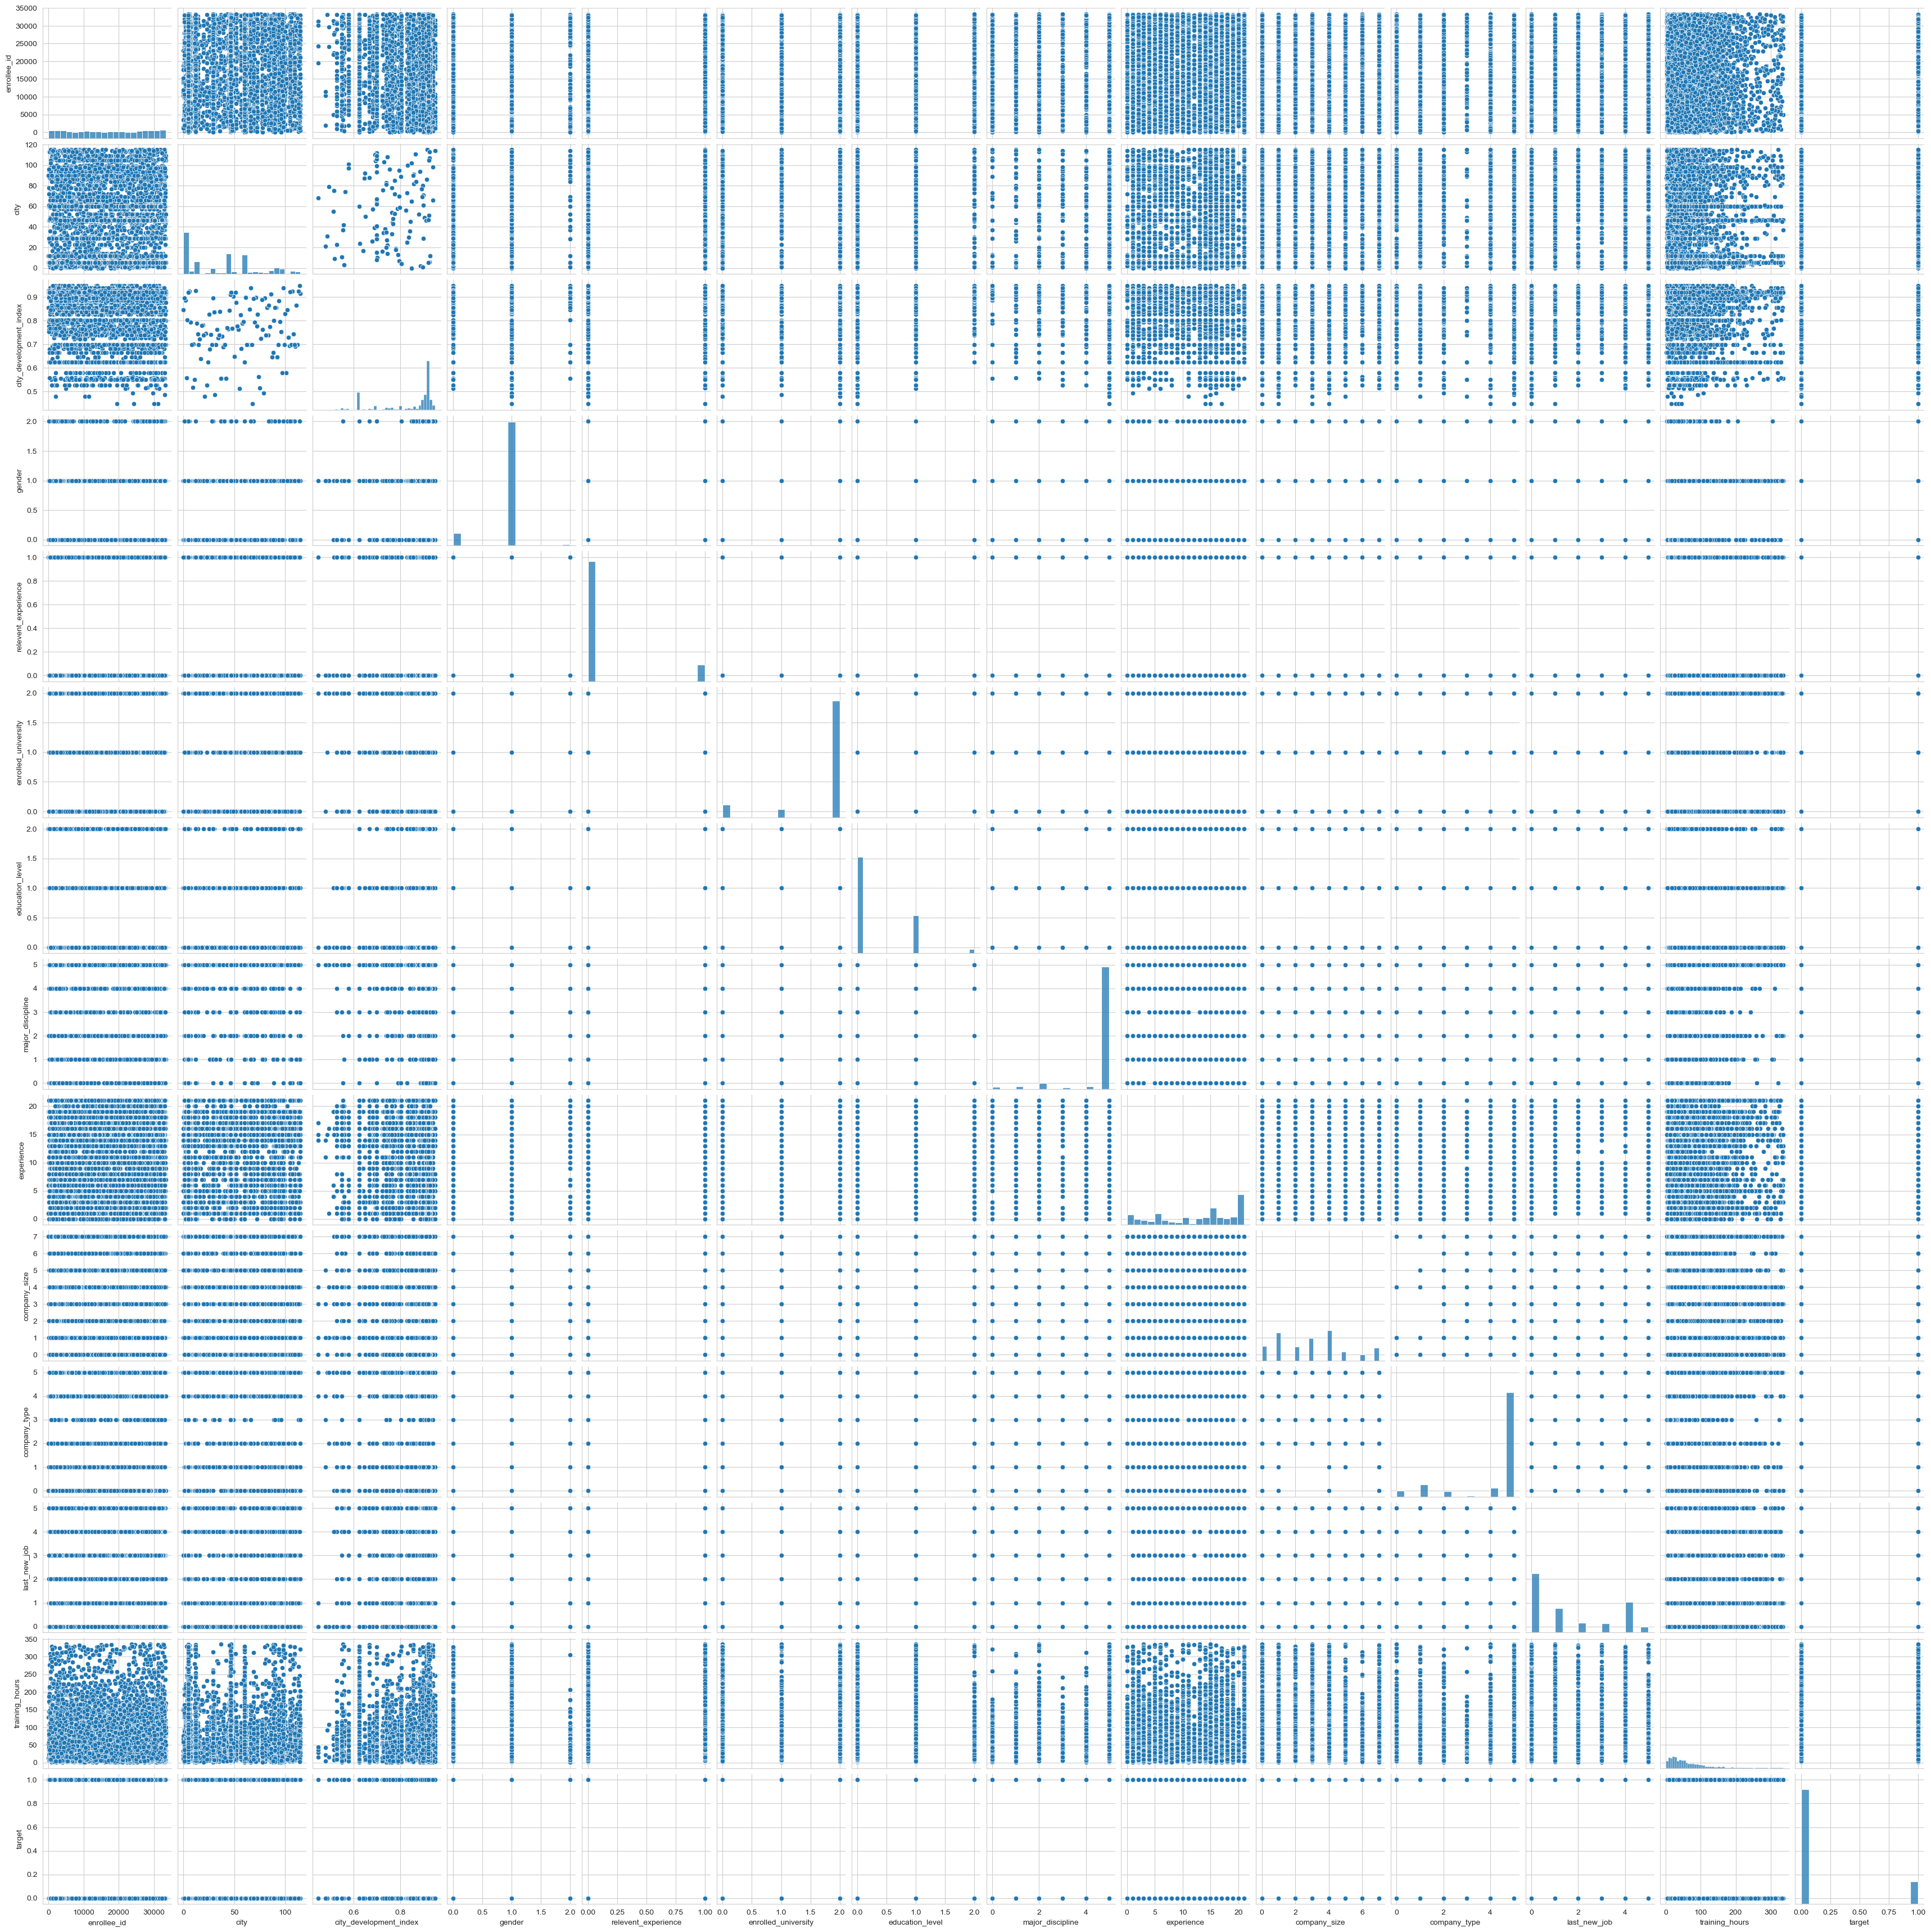

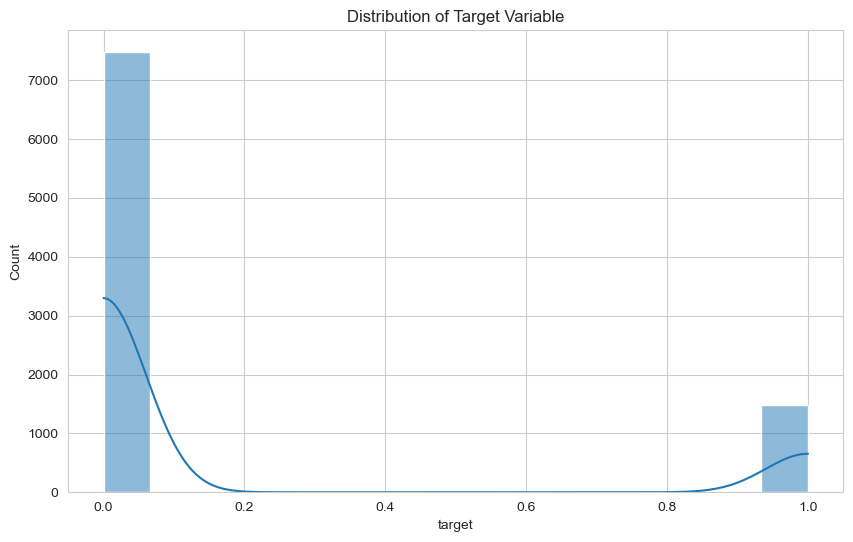

In [43]:
# Visualizing categorical columns
# categorical_columns = data.select_dtypes(include=['object']).columns

# for column in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=column, data=data)
#     plt.title(f'Count Plot of {column}')
#     plt.show()

# Pairplot
sns.pairplot(data)
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [9]:
# Model Training and Evaluation

In [12]:
# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict on test set
y_pred_lr = lr.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R²: {r2_lr}')

Linear Regression MAE: 0.2246131445876276
Linear Regression RMSE: 0.33713977422185604
Linear Regression MSE: 0.11366322736236405
Linear Regression R²: 0.13823538146701497


In [48]:
# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Predict on test set
y_pred_rf = rf.predict(X_test)

In [60]:
# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R²: {r2_rf}')

Random Forest MAE: 0.22180904522613065
Random Forest RMSE: 0.3407704673913505
Random Forest MSE: 0.11612451144611947
Random Forest R²: 0.1195745745485488


In [27]:
# Support Vector Classifier (SVC)

In [28]:
from sklearn.svm import SVC

# Train SVC model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [29]:
# Predict on test set
y_pred_svc = svc.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

# Evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'SVC Accuracy: {accuracy_svc}')

SVC Accuracy: 0.8436627582356225


In [31]:
# K-Nearest Neighbors Classifier (KNC)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Predict on test set
y_pred_knc = knc.predict(X_test)

In [34]:
# Evaluation metrics
accuracy_knc = accuracy_score(y_test, y_pred_knc)

print(f'KNN Accuracy: {accuracy_knc}')

KNN Accuracy: 0.8179787828029034


In [26]:
# Visualizing Predictions vs Actual

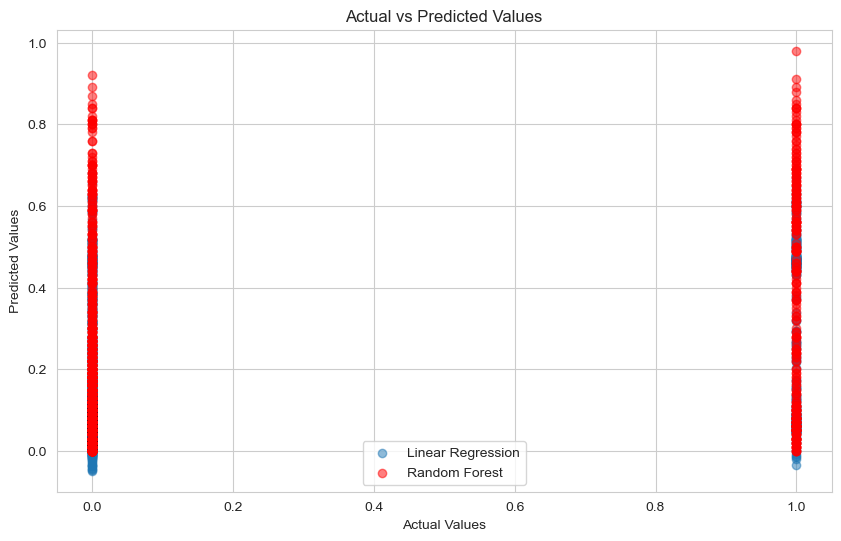

In [62]:
# Scatter plot of actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=2)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test)
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
print(f'Best SVC Accuracy: {accuracy_best_svc}')
print(f'Best SVC Classification Report:\n{classification_report(y_test, y_pred_best_svc)}')
print(f'Best SVC Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_svc)}')

In [ ]:
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=2)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f'Best KNN Accuracy: {accuracy_best_knn}')
print(f'Best KNN Classification Report:\n{classification_report(y_test, y_pred_best_knn)}')
print(f'Best KNN Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_knn)}')